In [102]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import itertools

In [143]:

### simulation params ###
N = 5 # number of neighbours
K = 4 # number of possible states

W_LEN = 100 # array length
W_SQ = 20 * W_LEN // 128

MAX_TIME = 100 # maximal time of simulation

lam_min = 0.0
lam_max = 1.0 - 1/K
print((lam_min, lam_max))

# we assume that s_q is "0"

(0.0, 0.75)


In [247]:
def generateAutomata(lam):
    # init transition function using table-walk-through method from 2.1.2
    domain = list(itertools.product(range(K), repeat=N))
    # generate values accroding to method
    values = [0 for x in range(0, K**N)]
    param = K**N
    while (K**N - param) / K**N < lam:
        i = random.randint(0, K**N-1)
        while values[i] != 0:
            i = random.randint(0, K**N-1)
        values[i] = random.randint(1, K-1)
        param -= 1
    #final transition function
    delta = dict(zip(domain, values))

    print ((K**N - param) / K**N)
    #print(delta)
    #print(values)

    # init world
    world = np.random.randint(1, K, W_LEN, dtype=np.uint8)
    for i in random.sample(range(0, W_LEN), W_SQ):
        world[i] = 0

    # create heatmap (x - states, y - timeframes)
    def transition(w, delta):
        new_w = np.array([], dtype='int32')
        for i in range(0, W_LEN):
            ns_states = ()
            for n in range(0, N):
                ns_states = ns_states + tuple([w[(i + n - (N//2))%W_LEN]])
            new_state = delta[ns_states]
            new_w = np.append(new_w, [new_state])
        return new_w

    graph = np.array([world])
    for t in range(1, MAX_TIME):
        graph = np.append(graph, [transition(graph[t-1], delta)], axis=0)

    graph_wb = np.array(graph)
    for i in range(0, MAX_TIME):
        for j in range(0, W_LEN):
            if graph_wb[i][j] > 0:
                graph_wb[i][j] = 1

    return graph

0.1005859375


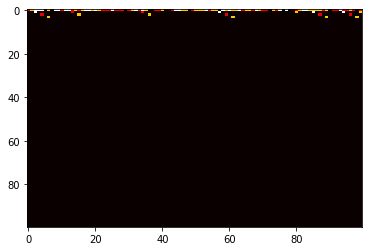

In [356]:
plot10 = generateAutomata(0.10)
plt.imshow(plot10, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

0.2001953125


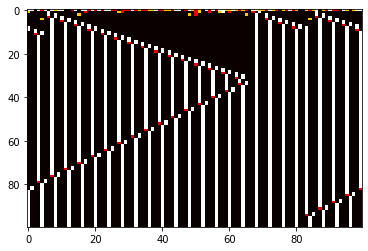

In [274]:
plot20 = generateAutomata(0.20)
plt.imshow(plot20, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

0.30078125


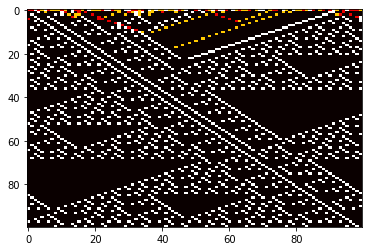

In [295]:
plot30 = generateAutomata(0.30)
plt.imshow(plot30, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

0.400390625


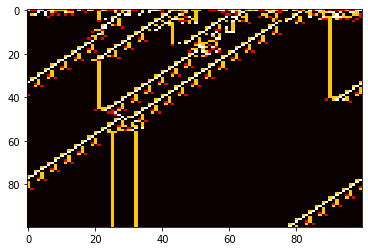

In [308]:
plot40 = generateAutomata(0.40)
plt.imshow(plot40, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

0.5


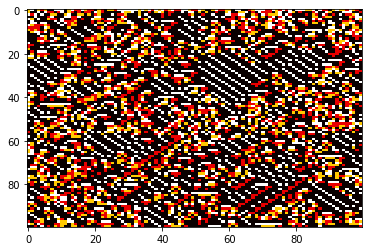

In [331]:
plot50 = generateAutomata(0.50)
plt.imshow(plot50, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

0.6005859375


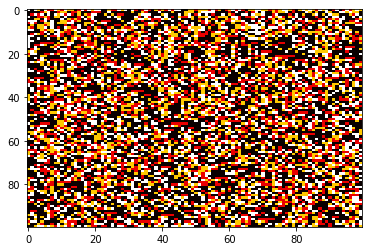

In [351]:
plot60 = generateAutomata(0.60)
plt.imshow(plot60, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

0.75


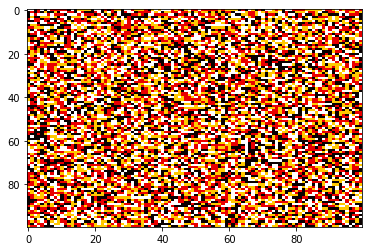

In [337]:
plot75 = generateAutomata(0.75)
plt.imshow(plot75, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()